In [ ]:
!unzip 'test_data.zip'

Archive:  /content/drive/MyDrive/dataset/test_data.zip
replace test_data/blasti/DSC_6396.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: test_data/blasti/DSC_6396.jpg  
  inflating: test_data/blasti/DSC_6397.jpg  
  inflating: test_data/blasti/DSC_6398.jpg  
  inflating: test_data/blasti/DSC_6399.jpg  
  inflating: test_data/blasti/DSC_6400.jpg  
  inflating: test_data/blasti/DSC_6401.jpg  
  inflating: test_data/blasti/DSC_6402.jpg  
  inflating: test_data/blasti/DSC_6403.jpg  
  inflating: test_data/blasti/DSC_6405.jpg  
  inflating: test_data/blasti/DSC_6406.jpg  
  inflating: test_data/blasti/DSC_6407.jpg  
  inflating: test_data/blasti/DSC_6408.jpg  
  inflating: test_data/blasti/DSC_6409.jpg  
  inflating: test_data/blasti/DSC_6410.jpg  
  inflating: test_data/blasti/DSC_6411.jpg  
  inflating: test_data/bonegl/DSC_4587.jpg  
  inflating: test_data/bonegl/DSC_4588.jpg  
  inflating: test_data/bonegl/DSC_4589.jpg  
  inflating: test_data/bonegl/DSC_4590.jpg  
  inflating

In [ ]:
!unzip '/content/drive/MyDrive/dataset/train_data.zip'

Archive:  /content/drive/MyDrive/dataset/train_data.zip
replace train_data/blasti/DSC_6382.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: train_data/blasti/DSC_6382.jpg  
  inflating: train_data/blasti/DSC_6383.jpg  
  inflating: train_data/blasti/DSC_6384-2.jpg  
  inflating: train_data/blasti/DSC_6384.jpg  
  inflating: train_data/blasti/DSC_6385.jpg  
  inflating: train_data/blasti/DSC_6386.jpg  
  inflating: train_data/blasti/DSC_6387.jpg  
  inflating: train_data/blasti/DSC_6388.jpg  
  inflating: train_data/blasti/DSC_6389.jpg  
  inflating: train_data/blasti/DSC_6390.jpg  
  inflating: train_data/blasti/DSC_6391.jpg  
  inflating: train_data/blasti/DSC_6392.jpg  
  inflating: train_data/blasti/DSC_6393.jpg  
  inflating: train_data/blasti/DSC_6394.jpg  
  inflating: train_data/blasti/DSC_6395.jpg  
   creating: train_data/bonegl/
  inflating: train_data/bonegl/DSC_4570.jpg  
  inflating: train_data/bonegl/DSC_4571.jpg  
  inflating: train_data/bonegl/DSC_4583.jpg  
  

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.3)

In [ ]:
test_gen= ImageDataGenerator(rescale=(1./255))

In [ ]:
train = train_gen.flow_from_directory('/content/train_data',target_size=(150,150),class_mode='categorical',batch_size=8)

Found 150 images belonging to 16 classes.


In [ ]:
test=test_gen.flow_from_directory('/content/test_data',target_size=(150,150),class_mode='categorical',batch_size=8)

Found 157 images belonging to 16 classes.


In [ ]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model = Sequential()
model.add(Convolution2D(12,(3,3),activation='relu',input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(24,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(36,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(54,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(16,activation='softmax'))

In [ ]:

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train,batch_size=8,validation_data=test,epochs=40)

Epoch 1/40
19/19 [==============================] - 103s 5s/step - loss: 2.7551 - accuracy: 0.1533 - val_loss: 2.7344 - val_accuracy: 0.1401
Epoch 2/40
19/19 [==============================] - 89s 5s/step - loss: 2.6678 - accuracy: 0.1067 - val_loss: 2.6609 - val_accuracy: 0.1592
Epoch 3/40
19/19 [==============================] - 120s 7s/step - loss: 2.5024 - accuracy: 0.1867 - val_loss: 2.5435 - val_accuracy: 0.1529
Epoch 4/40
19/19 [==============================] - 119s 7s/step - loss: 2.3977 - accuracy: 0.2067 - val_loss: 2.4920 - val_accuracy: 0.1847
Epoch 5/40
19/19 [==============================] - 88s 5s/step - loss: 2.2586 - accuracy: 0.2933 - val_loss: 2.4971 - val_accuracy: 0.1975
Epoch 6/40
19/19 [==============================] - 88s 5s/step - loss: 2.1302 - accuracy: 0.3267 - val_loss: 2.4278 - val_accuracy: 0.2930
Epoch 7/40
19/19 [==============================] - 120s 7s/step - loss: 1.9964 - accuracy: 0.3533 - val_loss: 2.3764 - val_accuracy: 0.2803
Epoch 8/40
19/19

In [ ]:
#Testing

import numpy as np
from tensorflow.keras.preprocessing import image


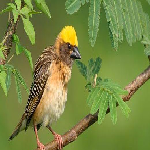

In [ ]:
img1= image.load_img('/content/bonegl.jpeg',target_size=(150,150))
img1

In [ ]:
img1=image.img_to_array(img1)
img1=np.expand_dims(img1,axis=0)


In [ ]:
prediction = np.argmax(model.predict(img1))
print(prediction)
species =['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']

print("The species is ",species[prediction])

1/1 [==============================] - 0s 19ms/step
1
The species is  bonegl


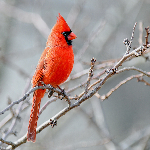

In [ ]:
img2= image.load_img('/content/himgri.jpg',target_size=(150,150))
img2

In [ ]:
img2=image.img_to_array(img2)
img2=np.expand_dims(img2,axis=0)

In [ ]:
prediction = np.argmax(model.predict(img2))
print(prediction)
species =['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']

print("The species is ",species[prediction])

1/1 [==============================] - 0s 19ms/step
11
The species is  jglowl
